## Zadanie 1 ##
- Zaimplementuj strukturę danych do przechowywania takiego grafu, gdzie każdy wierzchołek posiada najwyżej trzech sąsiadów: poprzednika („ojca”) i dwóch następników („synów”) – lewego i prawego.
- Zaimplementuj procedurę sprawdzania, czy zadany graf spełnia warunek BST, tzn. jest drzewem i dla każdego wierzchołka: wszystkie wierzchołki po stronie lewego następnika (włącznie) mają wartości mniejszą od wartości tego wierzchołka (dla prawego następnika analogicznie – wartości większe).
- Zaimplementuj funkcję graficznie wyświetlającą przechowywany graf.
- Zaimplementuj metodę korekty pozycji wierzchołka, który nie spełnia warunku BST.

- Zaimplementuj metodę tworzenia zrównoważonego (o możliwie najmniejszej głębokości) drzewa przeszukiwania binarnego z zadanego zbioru wierzchołków (wartości). Wykorzystaj wybraną metodę sortowania wraz z podejściem dziel i zwyciężaj.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
class Node():

    def __init__(self, data):
        self.data = data
        self.l_son = None
        self.r_son = None
        self.father = None

    def add_l_son(self, son):
        son.father = self
        self.l_son = son

    def add_r_son(self, son):
        son.father = self
        self.r_son = son


class Graph:

    def __init__(self, node=None):
        self.node = node
    """2 Kropka. Zaimplementuj procedurę sprawdzania, czy zadany graf spełnia warunek BST"""
    def check_BST(self):

        def checking(who,min,max):
            if who == None:
                return  True

            elif not min <= who.data <= max:
                return False

            return checking(who.l_son,min-1,who.data) and checking(who.r_son,who.data,max+1)

        return checking(self.node,self.find_min(),self.find_max()) # pierwsze min i max to najwieksze wartosci drzewa
    """4 kropka. Zaimplementuj metodę korekty pozycji wierzchołka, który nie spełnia warunku BST."""
    def correct_BST(self):

        def checking(who,min,max):
            if who == None:
                return True

            elif not min <= who.data <= max:
                new = random.randint(min,max)
                print(f'changing {who.data} to {new}')
                who.data = new
                return False

            return checking(who.l_son,min,who.data-1) and checking(who.r_son,who.data+1,max)

        return checking(self.node,self.find_min(),self.find_max())
    """5 kropka. Zaimplementuj metodę tworzenia zrównoważonego (o możliwie najmniejszej głębokości) drzewa prze-
        szukiwania binarnego z zadanego zbioru wierzchołków (wartości)."""
    def create_BST(self,nodes:list): #ostatni podpunkt
        nodes.sort() #sortujemy wierzcholki

        def spliting(nodes):

            if not nodes:
                return

            s = len(nodes) // 2
            nod = Node(nodes[s])

            l = spliting(nodes[:s])
            if l:
                nod.add_l_son(l)

            r = spliting(nodes[s+1:])
            if r:
                nod.add_r_son(r)

            return nod

        self.node = spliting(nodes)

    def find_min(self):

        def find(nod):

            if not nod.l_son:
                return nod.data

            return find(nod.l_son)

        return find(self.node)


    def find_max(self):

        def find(nod):

            if not nod.r_son:
                return nod.data

            return find(nod.r_son)

        return find(self.node)

    """3 kropka Zaimplementuj funkcję graficznie wyświetlającą przechowywany graf."""
    def show(self):
        G = nx.Graph()

        def connect(node):
            if node == None:
                return

            G.add_node(node.data)
            if node.father != None:
                G.add_edge(node.data, node.father.data)

            connect(node.r_son)
            connect(node.l_son)

        connect(self.node)

        nx.draw(G,  with_labels=True, arrows=True)
        plt.show()

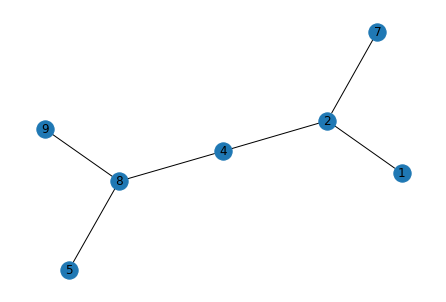

changing 7 to 3
False
True


In [3]:
t1 = Node(4)
t2 = Node(2)
t3 = Node(8)
t4 = Node(1)
t5 = Node(7)
t6 = Node(5)
t7 = Node(9)

t1.add_l_son(t2)
t1.add_r_son(t3)
t2.add_l_son(t4)
t2.add_r_son(t5)
t3.add_l_son(t6)
t3.add_r_son(t7)

g1 = Graph(t1)
g1.show()
print(g1.correct_BST())
print(g1.check_BST())


g2 = Graph()
g2.create_BST([3,5,4,8,7,10,13,2])
# g2.show()
# print(g2.check_BST())
# print(g1.find_min())